Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


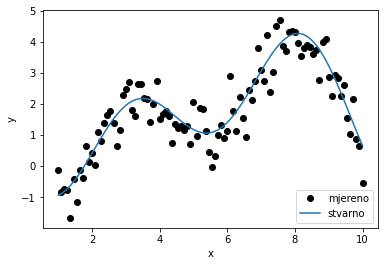

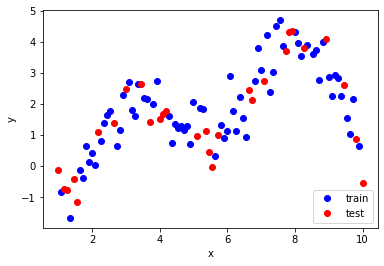

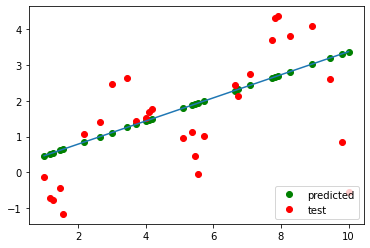

In [45]:
# ZAD 1

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


In [53]:
# ZAD 2

#dodavanje stupca s jedinicama
column_ones=np.ones(len(xtrain))
column_ones=column_ones[:,np.newaxis]
x_p=np.hstack((column_ones,xtrain))
#print(x_p)
#formula za racunanje parametara theta0 i theta1, formula 4-10
transp=np.transpose(x_p)
invert=np.linalg.inv(np.dot(transp,x_p))
theta1=np.dot(np.dot(invert,transp),ytrain)
print ('Model je oblika y_hat = Theta0 + Theta1 * x')
print ('y_hat = ', theta1[0], '+', theta1[1], '*x') 

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [0.3225882] *x


Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14217161] + [0.32259102] *x


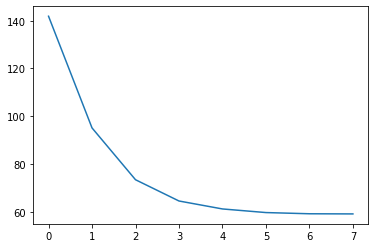

In [49]:
# ZAD 3

n=len(xtrain)
def pravac(x, theta0, theta1):
    return theta0 + theta1*x

alfa = 0.01
theta = [0,0]
sve_udalj=[]

for i in range(0,5000):
    sumat1=0
    sumat2=0
    udalj=0
    for j in range (0, n):
        sumat1= sumat1 + (pravac(xtrain[j], theta[0], theta[1])-ytrain[j])*xtrain[j]/len(xtrain)
        sumat2= sumat2 + (pravac(xtrain[j], theta[0], theta[1])-ytrain[j])/len(xtrain);
        udalj=udalj + abs(ytrain[j]-theta[0]-theta[1]*xtrain[j])  #suma udaljenosti svake točke od pravca po y osi
    sve_udalj.append(udalj) #sprema tu udaljenost u vektor svih udaljenosti [za sve iteracije]
    theta[0] =theta[0] - alfa*sumat2;    
    theta[1] =theta[1] - alfa*sumat1;

        
plt.figure(4)
plt.plot(sve_udalj[:8])
print ('Model je oblika y_hat = Theta0 + Theta1 * x')
print ('y_hat = ', theta[0], '+', theta[1], '*x')

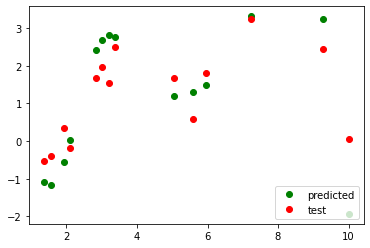

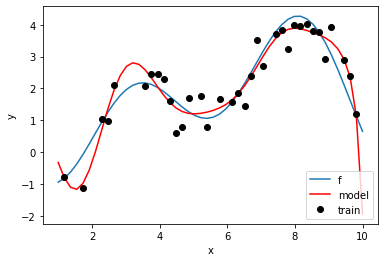

In [54]:
# ZAD 4

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)
